In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%cd evaluation/perf_runtime

/Users/yasith/projects/streaminghub/streaminghub/evaluation/perf_runtime


In [2]:
df_ipc_stats = pd.read_csv("stats/run_ipc.csv")
df_rpc_avro_stats = pd.read_csv("stats/run_rpc_avro.csv")
df_rpc_json_stats = pd.read_csv("stats/run_rpc_json.csv")
df_rpc_msgpack_stats = pd.read_csv("stats/run_rpc_msgpack.csv")

In [3]:
df_stats = pd.concat([df_ipc_stats, df_rpc_avro_stats, df_rpc_json_stats, df_rpc_msgpack_stats], ignore_index=True)
df_stats = df_stats.melt(id_vars=["dataset_name", "runtime", "num_points", "run"], var_name="metric").sort_index()

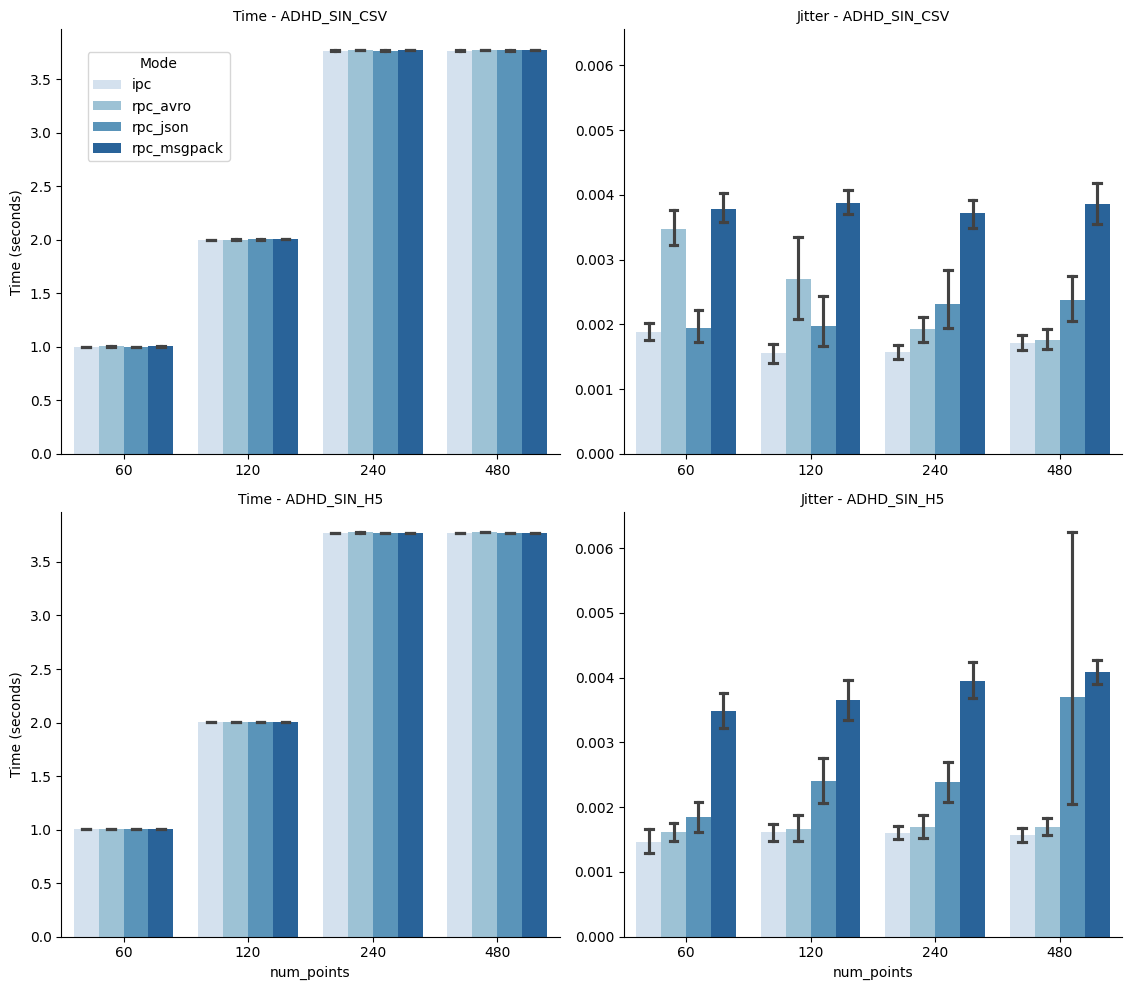

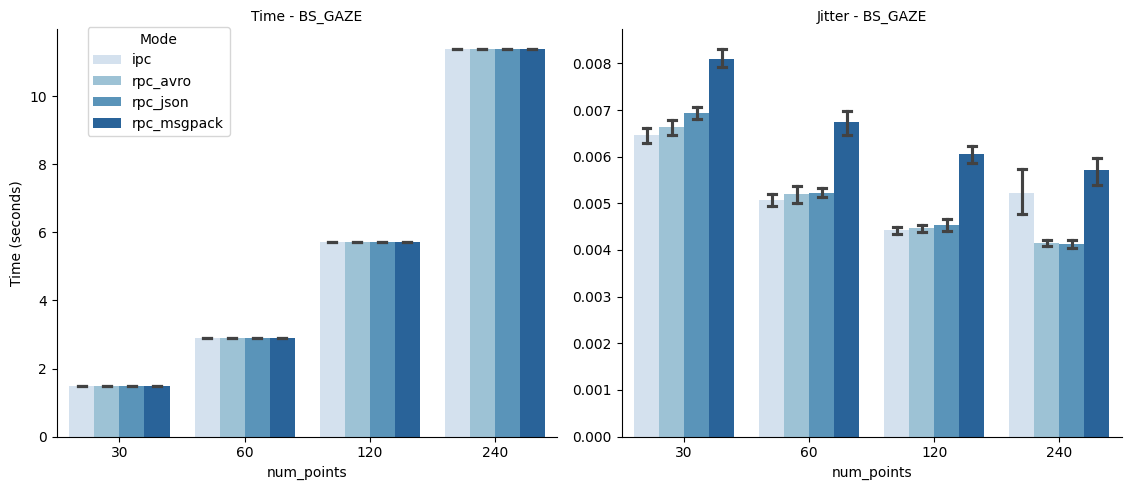

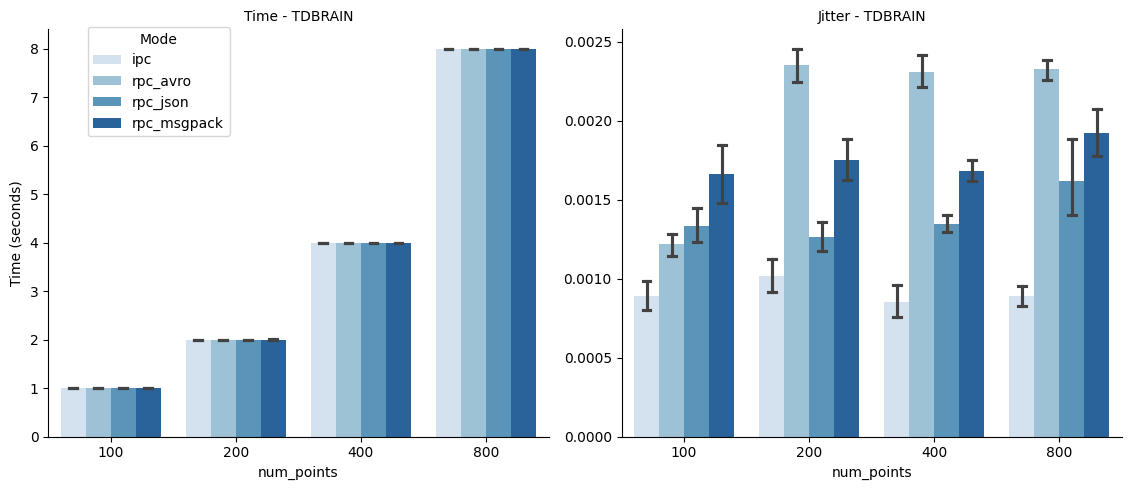

In [4]:
for dataset in ["adhd_sin", "battleship_gaze", "tdbrain"]:
    data = df_stats.loc[df_stats['dataset_name'].str.lower().str.startswith(dataset)].copy()
    data["metric"] = data["metric"].str.title()
    if dataset == "adhd_sin":
        data['dataset_name'] = data['dataset_name'].replace({"adhd_sin_h5": "ADHD_SIN_H5", "ADHD_SIN": "ADHD_SIN_CSV"})
    elif dataset == "battleship_gaze":
        data['dataset_name'] = "BS_GAZE"
    elif dataset == "tdbrain":
        data['dataset_name'] = "TDBRAIN"
    else:
        raise ValueError(dataset)
    frac = (.075, .95)
    g = sns.catplot(
        data,
        kind="bar",
        col="metric",
        row="dataset_name",
        x="num_points",
        y="value",
        hue="runtime",
        palette="Blues",
        sharey="col",
        sharex=False,
        capsize=.25,
    )
    g.set_ylabels("Time (seconds)")
    g.set_titles("{col_name} - {row_name}")
    sns.move_legend(g, "upper left", bbox_to_anchor=frac, title="Mode", frameon=True)
    plt.tight_layout()
    plt.savefig(f"figures/stats_{dataset}.pdf")
    plt.show()